### IMPORTING REQUIERED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## DATA COLLECTION

In [3]:
suv_data=pd.read_csv('suv_dataset.csv')
suv_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
print('no of users = '+str(len(suv_data.index)))

no of users = 400


## DATA ANALYSIS

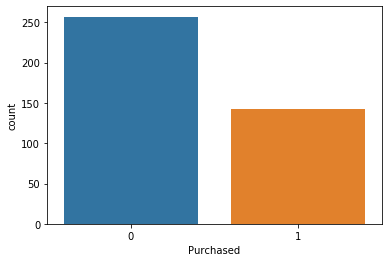

In [7]:
sns.countplot(x="Purchased",data=suv_data)

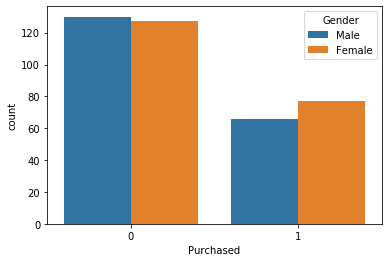

In [9]:
sns.countplot(x="Purchased",hue="Gender",data=suv_data)

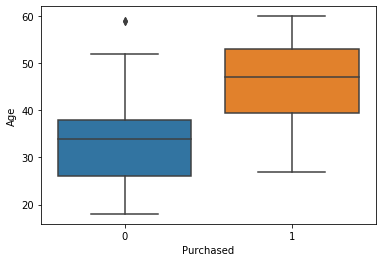

In [10]:
sns.boxplot(x="Purchased",y="Age",data=suv_data)

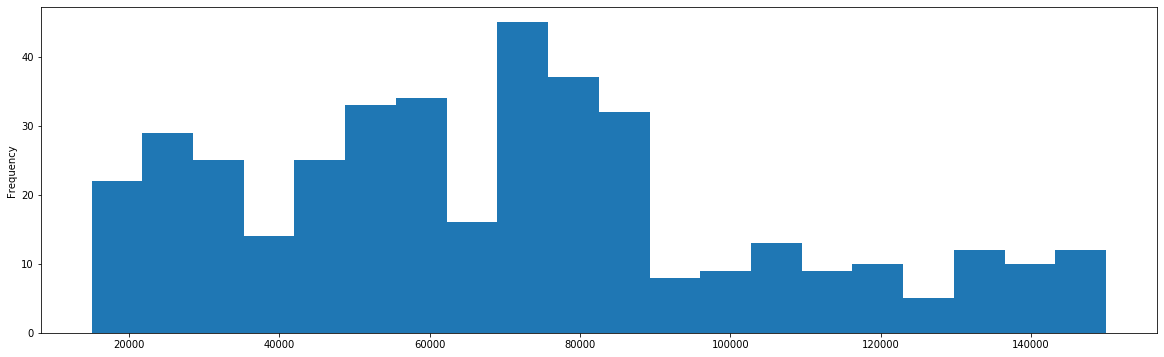

In [12]:
suv_data["EstimatedSalary"].plot.hist(bins=20,figsize=(20,6))

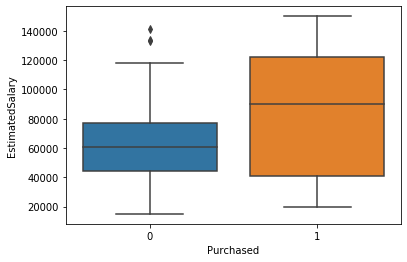

In [13]:
sns.boxplot(x="Purchased",y="EstimatedSalary",data=suv_data)

## DATA CLEANING

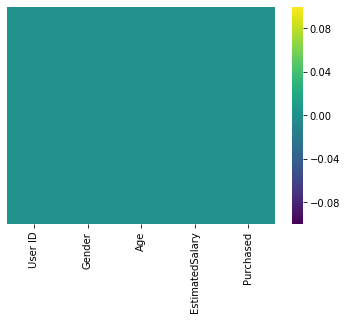

In [17]:
sns.heatmap(suv_data.isnull(),yticklabels=False,cmap='viridis')

In [19]:
suv_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
suv_data=suv_data.drop(["User ID"],axis=1)
suv_data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [22]:
gender=pd.get_dummies(suv_data["Gender"],drop_first=True)
gender

,Male
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [24]:
suv_data=pd.concat([suv_data,gender],axis=1)
suv_data

,Gender,Age,EstimatedSalary,Purchased,Male
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1
...,...,...,...,...,...
395,Female,46,41000,1,0
396,Male,51,23000,1,1
397,Female,50,20000,1,0
398,Male,36,33000,0,1


In [25]:
suv_data=suv_data.drop(["Gender"],axis=1)
suv_data

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


### TRAIN TEST SPLIT

In [26]:
X=suv_data.drop(["Purchased"],axis=1)
y=suv_data["Purchased"]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### STANDARD SCALER

In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

## LOGISTIC REGRESSION

In [30]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [31]:
lr.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred=lr.predict(X_test)

### CLASSIFICATION REPORT

In [33]:
from sklearn.metrics import classification_report as cr
print(cr(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92        68
           1       0.82      0.84      0.83        32

    accuracy                           0.89       100
   macro avg       0.87      0.88      0.87       100
weighted avg       0.89      0.89      0.89       100



### CONFUSION MATRIX

In [34]:
from sklearn.metrics import confusion_matrix as cm
print(cm(y_test,y_pred))

[[62  6]
 [ 5 27]]


# ACCURACY SCORE

In [35]:
from sklearn.metrics import accuracy_score as ac
print(ac(y_test,y_pred))

0.89
